In [1]:
import sgkit as sg
import pandas as pd
import numpy as np
import zarr
import xarray as xr
import allel

In [49]:
import os
os.chdir('/Users/christinagkertsou/Desktop/Finalyearproject/data')
os. getcwd()

'/Users/christinagkertsou/Desktop/Finalyearproject/data'

In [4]:
# Fields to import from VCF
format_fields = ["FORMAT/AD",
                 "FORMAT/DP",
                 "FORMAT/GT",
                 "FORMAT/GQ"]

info_fields = ["INFO/AC",
               "INFO/DP",
               "INFO/MQ"]

In [8]:
import os
import glob
from sgkit.io.vcf import vcf_to_zarr

# takes about 25 min
vcfs = glob.glob("/Users/christinagkertsou/Desktop/Finalyearproject/data/**/*vcf.gz")
for vcf in vcfs:
    filename = os.path.basename(vcf)
    path = os.path.dirname(vcf)
    contig = filename.split('.')[0]

    if contig in ['AgamP4_2L', 'AgamP4_2R', 'AgamP4_3L', 'AgamP4_3R', 'AgamP4_X']:
        save_path = os.path.join(path, contig, f'{contig}.zarr')
        vcf_to_zarr(vcf, save_path, tempdir='_tmp', 
            fields=format_fields + info_fields,
            field_defs={"FORMAT/AD": {"Number": "R"}})

/opt/anaconda3/envs/hybrids/lib/python3.8/site-packages/sgkit/io/vcf/vcf_reader.py:893: MaxAltAllelesExceededWarning: Some alternate alleles were dropped, since actual max value 4 exceeded max_alt_alleles setting of 3.
  warnings.warn(
/opt/anaconda3/envs/hybrids/lib/python3.8/site-packages/sgkit/io/vcf/vcf_reader.py:893: MaxAltAllelesExceededWarning: Some alternate alleles were dropped, since actual max value 4 exceeded max_alt_alleles setting of 3.
  warnings.warn(
/opt/anaconda3/envs/hybrids/lib/python3.8/site-packages/sgkit/io/vcf/vcf_reader.py:893: MaxAltAllelesExceededWarning: Some alternate alleles were dropped, since actual max value 4 exceeded max_alt_alleles setting of 3.
  warnings.warn(
/opt/anaconda3/envs/hybrids/lib/python3.8/site-packages/sgkit/io/vcf/vcf_reader.py:893: MaxAltAllelesExceededWarning: Some alternate alleles were dropped, since actual max value 4 exceeded max_alt_alleles setting of 3.
  warnings.warn(
/opt/anaconda3/envs/hybrids/lib/python3.8/site-packages/

In [12]:
print (vcfs)

['/Users/christinagkertsou/Desktop/Finalyearproject/data/hyb_rnaseq/AgamP4_3L.RNAseq.SNPs.filtered.vcf.gz', '/Users/christinagkertsou/Desktop/Finalyearproject/data/hyb_rnaseq/AgamP4_2R.RNAseq.SNPs.filtered.vcf.gz', '/Users/christinagkertsou/Desktop/Finalyearproject/data/hyb_rnaseq/AgamP4_X.RNAseq.SNPs.filtered.vcf.gz', '/Users/christinagkertsou/Desktop/Finalyearproject/data/hyb_rnaseq/AgamP4_UNKN.RNAseq.SNPs.filtered.vcf.gz', '/Users/christinagkertsou/Desktop/Finalyearproject/data/hyb_rnaseq/AgamP4_3R.RNAseq.SNPs.filtered.vcf.gz', '/Users/christinagkertsou/Desktop/Finalyearproject/data/hyb_rnaseq/AgamP4_2L.RNAseq.SNPs.filtered.vcf.gz', '/Users/christinagkertsou/Desktop/Finalyearproject/data/hyb_rnaseq/AgamP4_Y_unplaced.RNAseq.SNPs.filtered.vcf.gz', '/Users/christinagkertsou/Desktop/Finalyearproject/data/gam_g3_pooled/AgamP4_2R.DNAseq.SNPs.filtered.vcf.gz', '/Users/christinagkertsou/Desktop/Finalyearproject/data/gam_g3_pooled/AgamP4_3L.DNAseq.SNPs.filtered.vcf.gz', '/Users/christinagker

In [16]:
os.chdir('/Users/christinagkertsou/Desktop/Finalyearproject')
os. getcwd()

'/Users/christinagkertsou/Desktop/Finalyearproject'

In [17]:
from sgkit.io.vcf import concat_zarrs

zarrs = glob.glob("data/ara_small/**/*.zarr")
concat_zarrs(zarrs, output='dataset/ara_small.snp.zarr')

zarrs = glob.glob("data/gam_g3_pooled/**/*.zarr")
concat_zarrs(zarrs, output='dataset/gam_g3_pooled.snp.zarr')

zarrs = glob.glob("data/hyb_rnaseq/**/*.zarr")
concat_zarrs(zarrs, output='dataset/hyb_rnaseq.snp.zarr')

In [102]:
# load dataset
z = zarr.open_consolidated('dataset/ara_small.snp.zarr')
ds = sg.load_dataset('dataset/ara_small.snp.zarr')

# maps contig names to contig indices stored in `variant_contig` 
ds["variant_contig_name"] = (["variants"], [ds.contigs[contig] for contig in ds["variant_contig"].values])

In [103]:
ds

<xarray.Dataset>
Dimensions:               (variants: 7211683, samples: 30, alleles: 4,
                           ploidy: 2, alt_alleles: 3)
Dimensions without coordinates: variants, samples, alleles, ploidy, alt_alleles
Data variables: (12/16)
    call_AD               (variants, samples, alleles) int32 dask.array<chunksize=(10000, 30, 4), meta=np.ndarray>
    call_DP               (variants, samples) int32 dask.array<chunksize=(10000, 30), meta=np.ndarray>
    call_GQ               (variants, samples) int32 dask.array<chunksize=(10000, 30), meta=np.ndarray>
    call_genotype         (variants, samples, ploidy) int8 dask.array<chunksize=(10000, 30, 2), meta=np.ndarray>
    call_genotype_mask    (variants, samples, ploidy) bool dask.array<chunksize=(10000, 30, 2), meta=np.ndarray>
    call_genotype_phased  (variants, samples) bool dask.array<chunksize=(10000, 30), meta=np.ndarray>
    ...                    ...
    variant_allele        (variants, alleles) object dask.array<chunksize=(10000, 4), meta=np.ndarray>
    variant_contig        (variants) int16 dask.array<chunksize=(10000,), meta=np.ndarray>
    variant_id            (variants) object dask.array<chunksize=(10000,), meta=np.ndarray>
    variant_id_mask       (variants) bool dask.array<chunksize=(10000,), meta=np.ndarray>
    variant_position      (variants) int32 dask.array<chunksize=(10000,), meta=np.ndarray>
    variant_contig_name   (variants) <U9 'AgamP4_X' 'AgamP4_X' ... 'AgamP4_2R'
Attributes:
    contigs:               ['AgamP4_2L', 'AgamP4_2R', 'AgamP4_3L', 'AgamP4_3R...
    max_alt_alleles_seen:  4
    source:                sgkit-0.4.0

In [104]:
from typing import Any, List, Optional, Sequence, Union

import numpy as np
import xarray as xr


def pslice_to_indexer(
    ds: xr.Dataset,
    contig: Union[None, str, Sequence[Optional[str]]] = None,
    start: Union[None, int, Sequence[Optional[int]]] = None,
    end: Union[None, int, Sequence[Optional[int]]] = None,
) -> Any:
    """Convert a genomic position slice (or slices) to an Xarray indexer for selecting variants.
    Parameters
    ----------
    ds
        Genotype call dataset.
    contig
        A single contig, or a sequence of contigs. If None and there is only one contig in the dataset then
        that contig will be assumed.
    start
        A single start position, or a sequence of start positions. Start positions are inclusive, following Python semantics.
        A start position of None means start of contig.
    end
        A single end position, or a sequence of end positions. End positions are exclusive, following Python semantics.
        An end position of None means end of contig.
    Returns
    -------
    An Xarray indexer suitable for indexing the dataset using :meth:`xarray.Dataset.isel` with a ``variants`` dimension key.
    Warnings
    --------
    The end position of indels are *not* considered, so the behavior is more
    like the bcftools ``--targets`` option (which only considers start position)
    than the ``--regions`` option (which considers overlaps).
    Examples
    --------
    >>> import sgkit as sg
    >>> ds = sg.simulate_genotype_call_dataset(n_variant=10, n_sample=2, n_contig=2)
    >>> ds.isel(dict(variants=sg.pslice_to_indexer(ds, "0"))) # doctest: +SKIP
    <xarray.Dataset>
    Dimensions:             (variants: 5, alleles: 2, samples: 2, ploidy: 2)
    Dimensions without coordinates: variants, alleles, samples, ploidy
    Data variables:
        variant_contig      (variants) int64 0 0 0 0 0
        variant_position    (variants) int64 0 1 2 3 4
        variant_allele      (variants, alleles) |S1 b'C' b'G' b'A' ... b'G' b'C'
        sample_id           (samples) <U2 'S0' 'S1'
        call_genotype       (variants, samples, ploidy) int8 0 0 1 0 1 ... 0 1 1 0 0
        call_genotype_mask  (variants, samples, ploidy) bool False False ... False
    >>> ds.isel(dict(variants=sg.pslice_to_indexer(ds, contigs=("0", "1"), starts=(2, 3), ends=(4, None)))) # doctest: +SKIP
    <xarray.Dataset>
    Dimensions:             (variants: 4, alleles: 2, samples: 2, ploidy: 2)
    Dimensions without coordinates: variants, alleles, samples, ploidy
    Data variables:
        variant_contig      (variants) int64 0 0 1 1
        variant_position    (variants) int64 2 3 3 4
        variant_allele      (variants, alleles) |S1 b'G' b'A' b'A' ... b'C' b'A'
        sample_id           (samples) <U2 'S0' 'S1'
        call_genotype       (variants, samples, ploidy) int8 1 0 0 1 0 ... 0 1 0 1 1
        call_genotype_mask  (variants, samples, ploidy) bool False False ... False
    """
    size = ds.dims["variants"]
    all_contigs = ds.attrs["contigs"]
    variant_contig = ds.variant_contig.values
    variant_position = ds.variant_position.values

    if contig is None:
        if len(all_contigs) != 1:
            raise ValueError("Contig must specified when dataset has multiple contigs.")

        # TODO: improve type checks
        if (
            (start is None and end is None)
            or isinstance(start, int)
            or isinstance(end, int)
        ):
            contig = all_contigs[0]
        else:
            if start is not None:
                n = len(start)
            elif end is not None:
                n = len(end)
            contig = [all_contigs[0]] * n

    # TODO: check contigs, starts, ends are all the same length (with some caveats - e.g. if on one contig)

    if (
        isinstance(contig, str)
        and (start is None or isinstance(start, int))
        and (end is None or isinstance(end, int))
    ):
        # assume single for the moment
        slice = _pslice_to_slice(
            all_contigs, variant_contig, variant_position, contig, start, end
        )
        return slice
    else:
        slices = [
            _pslice_to_slice(all_contigs, variant_contig, variant_position, c, s, e)
            for (c, s, e) in zip(contig, start, end)
        ]
        return np.concatenate([np.arange(*sl.indices(size)) for sl in slices])  # type: ignore[no-untyped-call]


def _pslice_to_slice(
    all_contigs: List[str],
    variant_contig: Any,
    variant_position: Any,
    contig: str,
    start: Optional[int] = None,
    end: Optional[int] = None,
) -> slice:

    contig_index = all_contigs.index(contig)
    contig_range = np.searchsorted(variant_contig, [contig_index, contig_index + 1])

    if start is None and end is None:
        start_index, end_index = contig_range
    else:
        contig_pos = variant_position[slice(contig_range[0], contig_range[1])]
        if start is None:
            start_index = contig_range[0]
            end_index = contig_range[0] + np.searchsorted(contig_pos, [end])[0]
        elif end is None:
            start_index = contig_range[0] + np.searchsorted(contig_pos, [start])[0]
            end_index = contig_range[1]
        else:
            start_index, end_index = contig_range[0] + np.searchsorted(
                contig_pos, [start, end]
            )

    return slice(start_index, end_index)

In [105]:
ds.isel(dict(variants=pslice_to_indexer(ds, "AgamP4_2L", 300, 500)))

<xarray.Dataset>
Dimensions:               (variants: 3, samples: 30, alleles: 4, ploidy: 2,
                           alt_alleles: 3)
Dimensions without coordinates: variants, samples, alleles, ploidy, alt_alleles
Data variables: (12/16)
    call_AD               (variants, samples, alleles) int32 dask.array<chunksize=(3, 30, 4), meta=np.ndarray>
    call_DP               (variants, samples) int32 dask.array<chunksize=(3, 30), meta=np.ndarray>
    call_GQ               (variants, samples) int32 dask.array<chunksize=(3, 30), meta=np.ndarray>
    call_genotype         (variants, samples, ploidy) int8 dask.array<chunksize=(3, 30, 2), meta=np.ndarray>
    call_genotype_mask    (variants, samples, ploidy) bool dask.array<chunksize=(3, 30, 2), meta=np.ndarray>
    call_genotype_phased  (variants, samples) bool dask.array<chunksize=(3, 30), meta=np.ndarray>
    ...                    ...
    variant_allele        (variants, alleles) object dask.array<chunksize=(3, 4), meta=np.ndarray>
    variant_contig        (variants) int16 dask.array<chunksize=(3,), meta=np.ndarray>
    variant_id            (variants) object dask.array<chunksize=(3,), meta=np.ndarray>
    variant_id_mask       (variants) bool dask.array<chunksize=(3,), meta=np.ndarray>
    variant_position      (variants) int32 dask.array<chunksize=(3,), meta=np.ndarray>
    variant_contig_name   (variants) <U9 'AgamP4_X' 'AgamP4_X' 'AgamP4_X'
Attributes:
    contigs:               ['AgamP4_2L', 'AgamP4_2R', 'AgamP4_3L', 'AgamP4_3R...
    max_alt_alleles_seen:  4
    source:                sgkit-0.4.0

In [106]:
ds['variant_position'][:10].compute()

<xarray.DataArray 'variant_position' (variants: 10)>
array([ 56, 184, 238, 251, 367, 442, 458, 504, 540, 549], dtype=int32)
Dimensions without coordinates: variants
Attributes:
    comment:  The reference position of the variant.

In [107]:
# add sample stats to the dataset
ds = sg.sample_stats(ds)

ds

<xarray.Dataset>
Dimensions:               (samples: 30, variants: 7211683, alleles: 4,
                           ploidy: 2, alt_alleles: 3)
Dimensions without coordinates: samples, variants, alleles, ploidy, alt_alleles
Data variables: (12/22)
    sample_n_called       (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_call_rate      (samples) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_het          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_ref      (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_alt      (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_non_ref      (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    ...                    ...
    variant_allele        (variants, alleles) object dask.array<chunksize=(10000, 4), meta=np.ndarray>
    variant_contig        (variants) int16 dask.array<chunksize=(10000,), meta=np.ndarray>
    variant_id            (variants) object dask.array<chunksize=(10000,), meta=np.ndarray>
    variant_id_mask       (variants) bool dask.array<chunksize=(10000,), meta=np.ndarray>
    variant_position      (variants) int32 dask.array<chunksize=(10000,), meta=np.ndarray>
    variant_contig_name   (variants) <U9 'AgamP4_X' 'AgamP4_X' ... 'AgamP4_2R'
Attributes:
    contigs:               ['AgamP4_2L', 'AgamP4_2R', 'AgamP4_3L', 'AgamP4_3R...
    max_alt_alleles_seen:  4
    source:                sgkit-0.4.0

In [108]:
# use .compute() to access the data in the array
ds['call_genotype'][:10].compute()

<xarray.DataArray 'call_genotype' (variants: 10, samples: 30, ploidy: 2)>
array([[[1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [0, 0],
        [0, 0],
        [0, 0],
...
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [0, 0],
        [0, 0],
        [0, 0],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1]]], dtype=int8)
Dimensions without coordinates: variants, samples, ploidy
Attributes:
    comment:       Call genotype. Encoded as allele values (0 for the referen...
    mixed_ploidy:  False

In [109]:
G =  ds['call_genotype']
is_hom_alt_fixed = ((G > 0) & (G[..., 0] == G)).all(dim="ploidy").all(dim="samples")

ds['variant_is_hom_alt_fixed'] = is_hom_alt_fixed

In [110]:
is_hom_alt_fixed[:10].compute()

<xarray.DataArray 'call_genotype' (variants: 10)>
array([False, False, False, False, False, False, False, False, False,
       False])
Dimensions without coordinates: variants

In [111]:
ds = ds.set_coords(['variant_is_hom_alt_fixed'])
ds

<xarray.Dataset>
Dimensions:                   (samples: 30, variants: 7211683, alleles: 4,
                               ploidy: 2, alt_alleles: 3)
Coordinates:
    variant_is_hom_alt_fixed  (variants) bool dask.array<chunksize=(10000,), meta=np.ndarray>
Dimensions without coordinates: samples, variants, alleles, ploidy, alt_alleles
Data variables: (12/22)
    sample_n_called           (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_call_rate          (samples) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_het              (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_alt          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_non_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    ...                        ...
    variant_allele            (variants, alleles) object dask.array<chunksize=(10000, 4), meta=np.ndarray>
    variant_contig            (variants) int16 dask.array<chunksize=(10000,), meta=np.ndarray>
    variant_id                (variants) object dask.array<chunksize=(10000,), meta=np.ndarray>
    variant_id_mask           (variants) bool dask.array<chunksize=(10000,), meta=np.ndarray>
    variant_position          (variants) int32 dask.array<chunksize=(10000,), meta=np.ndarray>
    variant_contig_name       (variants) <U9 'AgamP4_X' ... 'AgamP4_2R'
Attributes:
    contigs:               ['AgamP4_2L', 'AgamP4_2R', 'AgamP4_3L', 'AgamP4_3R...
    max_alt_alleles_seen:  4
    source:                sgkit-0.4.0

In [112]:
ds_markers = ds.isel(variants=ds.variant_is_hom_alt_fixed)
ds_markers

<xarray.Dataset>
Dimensions:                   (samples: 30, variants: 719889, alleles: 4,
                               ploidy: 2, alt_alleles: 3)
Coordinates:
    variant_is_hom_alt_fixed  (variants) bool dask.array<chunksize=(381,), meta=np.ndarray>
Dimensions without coordinates: samples, variants, alleles, ploidy, alt_alleles
Data variables: (12/22)
    sample_n_called           (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_call_rate          (samples) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_het              (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_alt          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_non_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    ...                        ...
    variant_allele            (variants, alleles) object dask.array<chunksize=(381, 4), meta=np.ndarray>
    variant_contig            (variants) int16 dask.array<chunksize=(381,), meta=np.ndarray>
    variant_id                (variants) object dask.array<chunksize=(381,), meta=np.ndarray>
    variant_id_mask           (variants) bool dask.array<chunksize=(381,), meta=np.ndarray>
    variant_position          (variants) int32 dask.array<chunksize=(381,), meta=np.ndarray>
    variant_contig_name       (variants) <U9 'AgamP4_X' ... 'AgamP4_2R'
Attributes:
    contigs:               ['AgamP4_2L', 'AgamP4_2R', 'AgamP4_3L', 'AgamP4_3R...
    max_alt_alleles_seen:  4
    source:                sgkit-0.4.0

In [113]:
#Gives an error but still gives the file

# ---------------- fixes a couple of bugs needed for saving -----------------------
for var in ds_markers:
    if not var.startswith('sample'):
        ds_markers[var] = ds_markers[var].chunk((10000, -1, -1))
        ds_markers[var].encoding.clear()

# save the dataset
ds_markers.to_zarr('analysis/ara_markers.zarr', mode='w', )


/opt/anaconda3/envs/hybrids/lib/python3.8/site-packages/xarray/conventions.py:205: SerializationWarning: variable None has data in the form of a dask array with dtype=object, which means it is being loaded into memory to determine a data type that can be safely stored on disk. To avoid this, coerce this variable to a fixed-size dtype with astype() before saving it.
  warnings.warn(
/opt/anaconda3/envs/hybrids/lib/python3.8/site-packages/xarray/conventions.py:205: SerializationWarning: variable None has data in the form of a dask array with dtype=object, which means it is being loaded into memory to determine a data type that can be safely stored on disk. To avoid this, coerce this variable to a fixed-size dtype with astype() before saving it.
  warnings.warn(


ValueError: Zarr requires uniform chunk sizes except for final chunk. Variable named 'variant_is_hom_alt_fixed' has incompatible dask chunks: ((381, 630, 733, 455, 670, 776, 746, 821, 873, 955, 956, 616, 541, 691, 760, 968, 786, 480, 588, 855, 776, 601, 888, 776, 839, 986, 785, 750, 6, 184, 559, 7, 93, 488, 720, 865, 611, 525, 353, 240, 363, 553, 753, 703, 814, 643, 524, 795, 702, 758, 820, 616, 4, 415, 7, 55, 1003, 1062, 1180, 1115, 837, 896, 903, 1120, 1069, 1247, 1054, 1148, 1086, 1924, 2237, 1542, 1278, 1825, 1367, 1562, 1759, 1491, 1619, 1244, 1632, 1666, 2543, 2754, 2707, 2697, 1467, 2212, 2188, 2008, 3050, 3177, 2246, 2877, 1421, 1265, 767, 121, 177, 391, 536, 276, 1073, 578, 958, 1239, 1373, 249, 1261, 1149, 1302, 296, 1, 2, 3, 2, 140, 644, 841, 856, 782, 677, 846, 969, 965, 880, 854, 881, 983, 1317, 1151, 1172, 1052, 917, 891, 964, 1071, 502, 633, 781, 451, 6, 977, 1464, 1297, 1302, 5, 762, 1356, 1, 5, 1158, 1910, 1336, 1172, 603, 78, 664, 888, 963, 985, 943, 739, 425, 855, 241, 11, 40, 832, 680, 137, 835, 763, 471, 757, 507, 4, 175, 866, 670, 633, 694, 568, 814, 727, 647, 963, 1403, 1413, 1052, 778, 335, 191, 550, 747, 801, 847, 1089, 863, 874, 1113, 882, 863, 1174, 722, 938, 836, 737, 815, 741, 1087, 959, 906, 707, 632, 769, 960, 760, 508, 509, 697, 683, 1191, 745, 1038, 866, 1436, 1670, 1263, 1516, 1392, 843, 846, 708, 678, 774, 797, 708, 1065, 1128, 920, 922, 901, 950, 1642, 1737, 1620, 1801, 1437, 1425, 1558, 1224, 958, 388, 378, 1288, 1599, 1358, 1023, 807, 1324, 1105, 891, 1269, 1226, 1438, 1519, 1498, 1014, 941, 885, 1098, 1019, 976, 101, 713, 780, 917, 1104, 946, 1216, 735, 87, 161, 518, 794, 667, 765, 521, 984, 1233, 1081, 1160, 885, 912, 1143, 1044, 1498, 1116, 1041, 1077, 652, 845, 294, 21, 14, 17, 57, 601, 713, 663, 529, 941, 1177, 1073, 939, 363, 2, 1, 4, 1, 2, 400, 531, 2, 331, 3, 3, 1, 1, 2, 587, 999, 65, 1169, 1140, 1055, 986, 1410, 1122, 1151, 1024, 687, 781, 748, 743, 727, 1065, 841, 903, 1002, 1140, 960, 449, 2, 552, 1154, 1193, 1179, 1195, 1164, 1193, 1249, 830, 692, 900, 919, 745, 963, 922, 850, 716, 640, 818, 1010, 1090, 1117, 1053, 1025, 1341, 1138, 1115, 1051, 1277, 1262, 1260, 1094, 1295, 876, 588, 561, 725, 743, 738, 674, 703, 262, 621, 421, 646, 723, 913, 1085, 1060, 1064, 606, 3, 1, 1, 1, 1, 1, 214, 779, 1006, 1285, 112, 4, 1, 202, 255, 1219, 1069, 1008, 895, 1080, 1182, 1364, 287, 1101, 1110, 1792, 2430, 1818, 2311, 1098, 301, 782, 734, 703, 658, 399, 671, 978, 1028, 901, 961, 1228, 1146, 1020, 1001, 1198, 1088, 319, 559, 1105, 134, 2, 196, 1174, 1828, 2384, 2065, 1805, 2055, 2292, 1268, 1065, 140, 735, 467, 423, 1316, 1463, 1575, 1621, 2509, 2071, 446, 2040, 1620, 2408, 2432, 1608, 1589, 1847, 1881, 1989, 1575, 2417, 2447, 2780, 1803, 1199, 1535, 1447, 1078, 1286, 1076, 1225, 1218, 1205, 1130, 1621, 456, 865, 1175, 982, 726, 1017, 1210, 1386, 1280, 2005, 274, 2, 192, 1054, 888, 315, 1770, 1153, 1903, 2197, 1503, 1753, 2471, 2968, 712, 2398, 2074, 1604, 2622, 2520, 2479, 1647, 671, 1969, 2589, 2329, 885, 496, 898, 528, 1311, 3007, 2930, 2711, 3420, 1468, 2873, 2955, 2874, 2819, 2528, 2250, 2627, 2616, 2429, 2990, 2379, 2300, 1802, 1485, 4242, 4260, 4948, 8362, 1334, 1053, 1112, 1046, 1251, 1546, 1523, 1505, 1028, 917, 1246, 1598, 1200, 962, 901, 898, 814, 676, 628, 899, 876, 769, 251, 649, 642, 1326, 1796, 1197, 1342, 2366, 12, 10, 1087, 1198, 2165, 1526, 1163, 915, 739, 851, 471, 1290, 742, 426, 9, 1, 1, 2, 516, 1782, 1055, 645, 16, 532, 5, 132, 528, 1, 2, 3, 1, 4, 9, 449, 928, 1792, 828, 930, 601, 2261, 3069, 641, 758, 1460, 2109, 534, 9, 397, 1510, 2066, 2208, 398, 338, 1495, 24, 790, 611, 396, 407, 21, 2280, 2899, 1542, 530, 1838, 1470, 995, 329, 908, 1009, 1205, 1308, 1372, 786, 709, 1390, 1796, 1886, 1276, 697, 574, 862, 1841, 2362, 2232, 2316, 2368, 1179, 1511, 1937, 1640, 1649, 371, 18),). Consider rechunking using `chunk()`.

/opt/anaconda3/envs/hybrids/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='call_DP', ylabel='Density'>

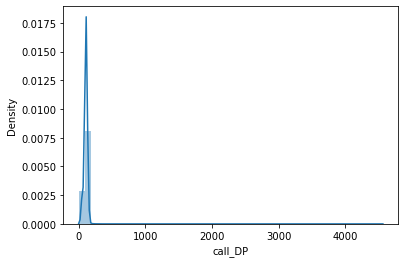

In [114]:
import seaborn as sns
%matplotlib inline

sns.distplot(ds_markers.call_DP)

In [115]:
G = allel.GenotypeDaskArray(ds_markers['call_genotype'])
G

/opt/anaconda3/envs/hybrids/lib/python3.8/site-packages/dask/array/core.py:3263: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(


<GenotypeDaskArray shape=(719889, 30, 2) dtype=int8>

In [120]:
#Subsetting of chromosomes starts here
ds_markers1 = ds.isel(variants=ds.variant_contig_name=="AgamP4_2L")
print(ds_markers1)

<xarray.Dataset>
Dimensions:                   (samples: 30, variants: 1991012, alleles: 4,
                               ploidy: 2, alt_alleles: 3)
Coordinates:
    variant_is_hom_alt_fixed  (variants) bool dask.array<chunksize=(3872,), meta=np.ndarray>
Dimensions without coordinates: samples, variants, alleles, ploidy, alt_alleles
Data variables: (12/22)
    sample_n_called           (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_call_rate          (samples) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_het              (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_alt          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_non_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    ...                        ...
    variant_allele            (variants, alleles) object 

In [121]:
ds_markers2 = ds.isel(variants=ds.variant_contig_name=="AgamP4_2R")
print(ds_markers2)

<xarray.Dataset>
Dimensions:                   (samples: 30, variants: 1533615, alleles: 4,
                               ploidy: 2, alt_alleles: 3)
Coordinates:
    variant_is_hom_alt_fixed  (variants) bool dask.array<chunksize=(1932,), meta=np.ndarray>
Dimensions without coordinates: samples, variants, alleles, ploidy, alt_alleles
Data variables: (12/22)
    sample_n_called           (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_call_rate          (samples) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_het              (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_alt          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_non_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    ...                        ...
    variant_allele            (variants, alleles) object 

In [122]:
ds_markers3 = ds.isel(variants=ds.variant_contig_name=="AgamP4_3L")
print(ds_markers3)

<xarray.Dataset>
Dimensions:                   (samples: 30, variants: 1110928, alleles: 4,
                               ploidy: 2, alt_alleles: 3)
Coordinates:
    variant_is_hom_alt_fixed  (variants) bool dask.array<chunksize=(2860,), meta=np.ndarray>
Dimensions without coordinates: samples, variants, alleles, ploidy, alt_alleles
Data variables: (12/22)
    sample_n_called           (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_call_rate          (samples) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_het              (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_alt          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_non_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    ...                        ...
    variant_allele            (variants, alleles) object 

In [123]:
ds_markers4 = ds.isel(variants=ds.variant_contig_name=="AgamP4_3R")
print(ds_markers4)

<xarray.Dataset>
Dimensions:                   (samples: 30, variants: 1888343, alleles: 4,
                               ploidy: 2, alt_alleles: 3)
Coordinates:
    variant_is_hom_alt_fixed  (variants) bool dask.array<chunksize=(2215,), meta=np.ndarray>
Dimensions without coordinates: samples, variants, alleles, ploidy, alt_alleles
Data variables: (12/22)
    sample_n_called           (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_call_rate          (samples) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_het              (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_alt          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_non_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    ...                        ...
    variant_allele            (variants, alleles) object 

In [124]:
ds_markers5 = ds.isel(variants=ds.variant_contig_name=="AgamP4_UNKN")
print(ds_markers5)


<xarray.Dataset>
Dimensions:                   (samples: 30, variants: 0, alleles: 4, ploidy: 2,
                               alt_alleles: 3)
Coordinates:
    variant_is_hom_alt_fixed  (variants) bool dask.array<chunksize=(0,), meta=np.ndarray>
Dimensions without coordinates: samples, variants, alleles, ploidy, alt_alleles
Data variables: (12/22)
    sample_n_called           (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_call_rate          (samples) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_het              (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_alt          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_non_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    ...                        ...
    variant_allele            (variants, alleles) object dask.arra

In [125]:
ds_markers6 = ds.isel(variants=ds.variant_contig_name=="AgamP4_X")
print(ds_markers6)

<xarray.Dataset>
Dimensions:                   (samples: 30, variants: 687785, alleles: 4,
                               ploidy: 2, alt_alleles: 3)
Coordinates:
    variant_is_hom_alt_fixed  (variants) bool dask.array<chunksize=(10000,), meta=np.ndarray>
Dimensions without coordinates: samples, variants, alleles, ploidy, alt_alleles
Data variables: (12/22)
    sample_n_called           (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_call_rate          (samples) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_het              (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_alt          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_non_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    ...                        ...
    variant_allele            (variants, alleles) object 

In [126]:
ds_markers7 = ds.isel(variants=ds.variant_contig_name=="AgamP4_Y_unplaced")
print(ds_markers7)

<xarray.Dataset>
Dimensions:                   (samples: 30, variants: 0, alleles: 4, ploidy: 2,
                               alt_alleles: 3)
Coordinates:
    variant_is_hom_alt_fixed  (variants) bool dask.array<chunksize=(0,), meta=np.ndarray>
Dimensions without coordinates: samples, variants, alleles, ploidy, alt_alleles
Data variables: (12/22)
    sample_n_called           (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_call_rate          (samples) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_het              (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_alt          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_non_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    ...                        ...
    variant_allele            (variants, alleles) object dask.arra

In [147]:
ds_markers8 = ds.isel(variants=ds.variant_contig_name=="AgamP4_Mt")
print(ds_markers8)

<xarray.Dataset>
Dimensions:                   (samples: 30, variants: 0, alleles: 4, ploidy: 2,
                               alt_alleles: 3)
Coordinates:
    variant_is_hom_alt_fixed  (variants) bool dask.array<chunksize=(0,), meta=np.ndarray>
Dimensions without coordinates: samples, variants, alleles, ploidy, alt_alleles
Data variables: (12/22)
    sample_n_called           (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_call_rate          (samples) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_het              (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_alt          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_non_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    ...                        ...
    variant_allele            (variants, alleles) object dask.arra

In [ ]:
#Excercise starts here 
# (q1)
ds.isel(dict(variants=pslice_to_indexer(ds_markers, "AgamP4_2L")))
ds_new = ds.isel(variants=ds.variant_is_hom_alt_fixed)
ds_markers

In [ ]:
ds.isel(dict(variants=pslice_to_indexer(ds_markers["variant_contig_name"], "AgamP4_2L")))

In [ ]:
ds_new = ds.isel(ds_markers == variant_contig_name["AgamP4_2L"])

In [ ]:
ds.isel(dict(variants=pslice_to_indexer(ds_markers, "AgamP4_2L")))
# maps contig names to contig indices stored in `variant_contig` 
ds["variant_contig_name"] = (["variants"], [ds.contigs[contig] for contig in ds["variant_contig"].values])

In [41]:
#edo2
#(q2)
ds_markers['variant_contig_name'].compute()

<xarray.DataArray 'variant_contig_name' (variants: 719889)>
array(['AgamP4_X', 'AgamP4_X', 'AgamP4_X', ..., 'AgamP4_2R', 'AgamP4_2R',
       'AgamP4_2R'], dtype='<U9')
Coordinates:
    variant_is_hom_alt_fixed  (variants) bool True True True ... True True True
Dimensions without coordinates: variants

In [261]:
#Density plot exercise (Arabiensis) (Also included at the last cell)

#Subset contig 
ds_sel = ds.isel(variants=ds.variant_contig_name == 'AgamP4_2L')
ds_sel

<xarray.Dataset>
Dimensions:                   (samples: 30, variants: 1991012, alleles: 4,
                               ploidy: 2, alt_alleles: 3)
Coordinates:
    variant_is_hom_alt_fixed  (variants) bool dask.array<chunksize=(3872,), meta=np.ndarray>
Dimensions without coordinates: samples, variants, alleles, ploidy, alt_alleles
Data variables: (12/22)
    sample_n_called           (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_call_rate          (samples) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_het              (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_alt          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_non_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    ...                        ...
    variant_allele            (variants, alleles) object dask.array<chunksize=(3872, 4), meta=np.ndarray>
    variant_contig            (variants) int16 dask.array<chunksize=(3872,), meta=np.ndarray>
    variant_id                (variants) object dask.array<chunksize=(3872,), meta=np.ndarray>
    variant_id_mask           (variants) bool dask.array<chunksize=(3872,), meta=np.ndarray>
    variant_position          (variants) int32 dask.array<chunksize=(3872,), meta=np.ndarray>
    variant_contig_name       (variants) <U9 'AgamP4_2L' ... 'AgamP4_2L'
Attributes:
    contigs:               ['AgamP4_2L', 'AgamP4_2R', 'AgamP4_3L', 'AgamP4_3R...
    max_alt_alleles_seen:  4
    source:                sgkit-0.4.0

In [262]:
#Subset contig position

ds_sel['variant_position'][:100].compute()


<xarray.DataArray 'variant_position' (variants: 100)>
array([ 1202,  2157,  2707,  2786,  3007,  9221,  9232,  9233,  9288,
        9843, 10116, 10294, 10309, 10583, 10590, 10619, 10673, 10683,
       13199, 13207, 13214, 13216, 13223, 13237, 13244, 13286, 13312,
       13391, 13415, 13442, 13464, 13501, 13510, 15114, 15162, 15493,
       17683, 17761, 18251, 18355, 18462, 25330, 26305, 26544, 26722,
       31185, 31449, 35705, 36133, 36336, 36358, 36470, 43926, 52486,
       52901, 56932, 58515, 58836, 58884, 59722, 59723, 60663, 60818,
       60832, 60853, 60883, 61177, 61214, 61235, 61607, 63263, 66145,
       71035, 71044, 71274, 71286, 72232, 72252, 72646, 73729, 73922,
       74655, 75843, 75877, 75946, 75949, 75989, 75991, 77338, 77443,
       77449, 77453, 77456, 77495, 77511, 77556, 77560, 77561, 77610,
       77917], dtype=int32)
Coordinates:
    variant_is_hom_alt_fixed  (variants) bool False False False ... False False
Dimensions without coordinates: variants
Attributes:
    comment:  The reference position of the variant.

In [263]:
#GitHub splice

from typing import Any, List, Optional, Sequence, Union

import numpy as np
import xarray as xr


def pslice_to_indexer(
    ds: xr.Dataset,
    contig: Union[None, str, Sequence[Optional[str]]] = None,
    start: Union[None, int, Sequence[Optional[int]]] = None,
    end: Union[None, int, Sequence[Optional[int]]] = None,
) -> Any:
    """Convert a genomic position slice (or slices) to an Xarray indexer for selecting variants.
    Parameters
    ----------
    ds
        Genotype call dataset.
    contig
        A single contig, or a sequence of contigs. If None and there is only one contig in the dataset then
        that contig will be assumed.
    start
        A single start position, or a sequence of start positions. Start positions are inclusive, following Python semantics.
        A start position of None means start of contig.
    end
        A single end position, or a sequence of end positions. End positions are exclusive, following Python semantics.
        An end position of None means end of contig.
    Returns
    -------
    An Xarray indexer suitable for indexing the dataset using :meth:`xarray.Dataset.isel` with a ``variants`` dimension key.
    Warnings
    --------
    The end position of indels are *not* considered, so the behavior is more
    like the bcftools ``--targets`` option (which only considers start position)
    than the ``--regions`` option (which considers overlaps).
    Examples
    --------
    >>> import sgkit as sg
    >>> ds = sg.simulate_genotype_call_dataset(n_variant=10, n_sample=2, n_contig=2)
    >>> ds.isel(dict(variants=sg.pslice_to_indexer(ds, "0"))) # doctest: +SKIP
    <xarray.Dataset>
    Dimensions:             (variants: 5, alleles: 2, samples: 2, ploidy: 2)
    Dimensions without coordinates: variants, alleles, samples, ploidy
    Data variables:
        variant_contig      (variants) int64 0 0 0 0 0
        variant_position    (variants) int64 0 1 2 3 4
        variant_allele      (variants, alleles) |S1 b'C' b'G' b'A' ... b'G' b'C'
        sample_id           (samples) <U2 'S0' 'S1'
        call_genotype       (variants, samples, ploidy) int8 0 0 1 0 1 ... 0 1 1 0 0
        call_genotype_mask  (variants, samples, ploidy) bool False False ... False
    >>> ds.isel(dict(variants=sg.pslice_to_indexer(ds, contigs=("0", "1"), starts=(2, 3), ends=(4, None)))) # doctest: +SKIP
    <xarray.Dataset>
    Dimensions:             (variants: 4, alleles: 2, samples: 2, ploidy: 2)
    Dimensions without coordinates: variants, alleles, samples, ploidy
    Data variables:
        variant_contig      (variants) int64 0 0 1 1
        variant_position    (variants) int64 2 3 3 4
        variant_allele      (variants, alleles) |S1 b'G' b'A' b'A' ... b'C' b'A'
        sample_id           (samples) <U2 'S0' 'S1'
        call_genotype       (variants, samples, ploidy) int8 1 0 0 1 0 ... 0 1 0 1 1
        call_genotype_mask  (variants, samples, ploidy) bool False False ... False
    """
    size = ds.dims["variants"]
    all_contigs = ds.attrs["contigs"]
    variant_contig = ds.variant_contig.values
    variant_position = ds.variant_position.values

    if contig is None:
        if len(all_contigs) != 1:
            raise ValueError("Contig must specified when dataset has multiple contigs.")

        # TODO: improve type checks
        if (
            (start is None and end is None)
            or isinstance(start, int)
            or isinstance(end, int)
        ):
            contig = all_contigs[0]
        else:
            if start is not None:
                n = len(start)
            elif end is not None:
                n = len(end)
            contig = [all_contigs[0]] * n

    # TODO: check contigs, starts, ends are all the same length (with some caveats - e.g. if on one contig)

    if (
        isinstance(contig, str)
        and (start is None or isinstance(start, int))
        and (end is None or isinstance(end, int))
    ):
        # assume single for the moment
        slice = _pslice_to_slice(
            all_contigs, variant_contig, variant_position, contig, start, end
        )
        return slice
    else:
        slices = [
            _pslice_to_slice(all_contigs, variant_contig, variant_position, c, s, e)
            for (c, s, e) in zip(contig, start, end)
        ]
        return np.concatenate([np.arange(*sl.indices(size)) for sl in slices])  # type: ignore[no-untyped-call]


def _pslice_to_slice(
    all_contigs: List[str],
    variant_contig: Any,
    variant_position: Any,
    contig: str,
    start: Optional[int] = None,
    end: Optional[int] = None,
) -> slice:

    contig_index = all_contigs.index(contig)
    contig_range = np.searchsorted(variant_contig, [contig_index, contig_index + 1])

    if start is None and end is None:
        start_index, end_index = contig_range
    else:
        contig_pos = variant_position[slice(contig_range[0], contig_range[1])]
        if start is None:
            start_index = contig_range[0]
            end_index = contig_range[0] + np.searchsorted(contig_pos, [end])[0]
        elif end is None:
            start_index = contig_range[0] + np.searchsorted(contig_pos, [start])[0]
            end_index = contig_range[1]
        else:
            start_index, end_index = contig_range[0] + np.searchsorted(
                contig_pos, [start, end]
            )

    return slice(start_index, end_index)

In [264]:
#pslice for specific positions
pslice_to_indexer(ds_sel, 'AgamP4_2L', 3900, 4500)

slice(5, 5, None)

In [265]:
#select for the first 100 variants
ds_sel['variant_position'][:100].compute()

<xarray.DataArray 'variant_position' (variants: 100)>
array([ 1202,  2157,  2707,  2786,  3007,  9221,  9232,  9233,  9288,
        9843, 10116, 10294, 10309, 10583, 10590, 10619, 10673, 10683,
       13199, 13207, 13214, 13216, 13223, 13237, 13244, 13286, 13312,
       13391, 13415, 13442, 13464, 13501, 13510, 15114, 15162, 15493,
       17683, 17761, 18251, 18355, 18462, 25330, 26305, 26544, 26722,
       31185, 31449, 35705, 36133, 36336, 36358, 36470, 43926, 52486,
       52901, 56932, 58515, 58836, 58884, 59722, 59723, 60663, 60818,
       60832, 60853, 60883, 61177, 61214, 61235, 61607, 63263, 66145,
       71035, 71044, 71274, 71286, 72232, 72252, 72646, 73729, 73922,
       74655, 75843, 75877, 75946, 75949, 75989, 75991, 77338, 77443,
       77449, 77453, 77456, 77495, 77511, 77556, 77560, 77561, 77610,
       77917], dtype=int32)
Coordinates:
    variant_is_hom_alt_fixed  (variants) bool False False False ... False False
Dimensions without coordinates: variants
Attributes:
    comment:  The reference position of the variant.

In [266]:
#saving in subset the splice of the specific positions
x = ds_sel.isel(variants=pslice_to_indexer(ds_sel, 'AgamP4_2L', 3900, 4500))
x

<xarray.Dataset>
Dimensions:                   (samples: 30, variants: 0, alleles: 4, ploidy: 2,
                               alt_alleles: 3)
Coordinates:
    variant_is_hom_alt_fixed  (variants) bool dask.array<chunksize=(0,), meta=np.ndarray>
Dimensions without coordinates: samples, variants, alleles, ploidy, alt_alleles
Data variables: (12/22)
    sample_n_called           (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_call_rate          (samples) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_het              (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_hom_alt          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    sample_n_non_ref          (samples) int64 dask.array<chunksize=(30,), meta=np.ndarray>
    ...                        ...
    variant_allele            (variants, alleles) object dask.array<chunksize=(0, 4), meta=np.ndarray>
    variant_contig            (variants) int16 dask.array<chunksize=(0,), meta=np.ndarray>
    variant_id                (variants) object dask.array<chunksize=(0,), meta=np.ndarray>
    variant_id_mask           (variants) bool dask.array<chunksize=(0,), meta=np.ndarray>
    variant_position          (variants) int32 dask.array<chunksize=(0,), meta=np.ndarray>
    variant_contig_name       (variants) <U9 
Attributes:
    contigs:               ['AgamP4_2L', 'AgamP4_2R', 'AgamP4_3L', 'AgamP4_3R...
    max_alt_alleles_seen:  4
    source:                sgkit-0.4.0

In [267]:
#length of variants for which we subsetted (here 0, because no variants for that subset)
len(x["variant_position"].compute())

0

In [269]:
#open length file and save in dictionary
with open('AgamP4.sizes', 'r') as f:
    sizes = f.readlines()
    

sizes_dict = {}

for size in sizes:
    chrom, lenght = size.split()
    
    sizes_dict[chrom] = int(lenght)

sizes_dict
    

{'AgamP4_2L': 49364325,
 'AgamP4_2R': 61545105,
 'AgamP4_3L': 41963435,
 'AgamP4_3R': 53200684,
 'AgamP4_UNKN': 42389979,
 'AgamP4_X': 24393108,
 'AgamP4_Y_unplaced': 237045,
 'AgamP4_Mt': 15363}

In [357]:
#np.array and for loop to get the start and end positions
window_limits = np.arange(1, sizes_dict['AgamP4_2L'], 150_000)

windows = []

for i in range(0, len(window_limits), 1):
    windows.append((window_limits[i-1], window_limits[i]))

windows

[(49350001, 1),
 (1, 150001),
 (150001, 300001),
 (300001, 450001),
 (450001, 600001),
 (600001, 750001),
 (750001, 900001),
 (900001, 1050001),
 (1050001, 1200001),
 (1200001, 1350001),
 (1350001, 1500001),
 (1500001, 1650001),
 (1650001, 1800001),
 (1800001, 1950001),
 (1950001, 2100001),
 (2100001, 2250001),
 (2250001, 2400001),
 (2400001, 2550001),
 (2550001, 2700001),
 (2700001, 2850001),
 (2850001, 3000001),
 (3000001, 3150001),
 (3150001, 3300001),
 (3300001, 3450001),
 (3450001, 3600001),
 (3600001, 3750001),
 (3750001, 3900001),
 (3900001, 4050001),
 (4050001, 4200001),
 (4200001, 4350001),
 (4350001, 4500001),
 (4500001, 4650001),
 (4650001, 4800001),
 (4800001, 4950001),
 (4950001, 5100001),
 (5100001, 5250001),
 (5250001, 5400001),
 (5400001, 5550001),
 (5550001, 5700001),
 (5700001, 5850001),
 (5850001, 6000001),
 (6000001, 6150001),
 (6150001, 6300001),
 (6300001, 6450001),
 (6450001, 6600001),
 (6600001, 6750001),
 (6750001, 6900001),
 (6900001, 7050001),
 (7050001, 7200

In [352]:
#min and max values for which we are going to choose the variants and positions
for window in windows[:3]:
    lower_limit = int(window[0])
    upper_limit = int(window[1])
    print(window)
    x = pslice_to_indexer(ds_sel, 'AgamP4_2L', lower_limit, upper_limit)
    num_snps = x.stop - x.start
    print(num_snps)
    # print(len(x['variant_position']))

(49300001, 1)
-1990322
(1, 100001)
346
(100001, 200001)
426


In [ ]:
#min and max values for which we are going to choose the variants and positions
for window in windows[1:]:
    lower_limit = int(window[0])
    upper_limit = int(window[1])
    print(window)
    x = pslice_to_indexer(ds_sel, 'AgamP4_2L', lower_limit, upper_limit)
    num_snps = x.stop - x.start
    print(num_snps)
    # print(len(x['variant_position']))

In [358]:
midpoints = []

numpoints=[]



#teliko kai me kentra
for window in windows[1:]:
    lower_limit = int(window[0])
    upper_limit = int(window[1])
    print(window)
    x = pslice_to_indexer(ds_sel, 'AgamP4_2L', lower_limit, upper_limit)
    num_snps = x.stop - x.start
    numpoints.append(num_snps)
    # print(len(x['variant_position']))
    mid=(lower_limit+upper_limit)/2
    midpoints.append(mid)
    

(1, 150001)
(150001, 300001)
(300001, 450001)
(450001, 600001)
(600001, 750001)
(750001, 900001)
(900001, 1050001)
(1050001, 1200001)
(1200001, 1350001)
(1350001, 1500001)
(1500001, 1650001)
(1650001, 1800001)
(1800001, 1950001)
(1950001, 2100001)
(2100001, 2250001)
(2250001, 2400001)
(2400001, 2550001)
(2550001, 2700001)
(2700001, 2850001)
(2850001, 3000001)
(3000001, 3150001)
(3150001, 3300001)
(3300001, 3450001)
(3450001, 3600001)
(3600001, 3750001)
(3750001, 3900001)
(3900001, 4050001)
(4050001, 4200001)
(4200001, 4350001)
(4350001, 4500001)
(4500001, 4650001)
(4650001, 4800001)
(4800001, 4950001)
(4950001, 5100001)
(5100001, 5250001)
(5250001, 5400001)
(5400001, 5550001)
(5550001, 5700001)
(5700001, 5850001)
(5850001, 6000001)
(6000001, 6150001)
(6150001, 6300001)
(6300001, 6450001)
(6450001, 6600001)
(6600001, 6750001)
(6750001, 6900001)
(6900001, 7050001)
(7050001, 7200001)
(7200001, 7350001)
(7350001, 7500001)
(7500001, 7650001)
(7650001, 7800001)
(7800001, 7950001)
(7950001, 8

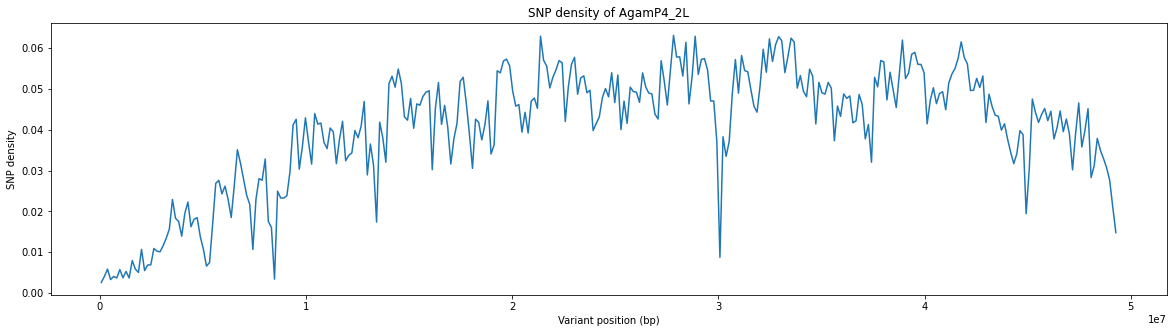

In [413]:
#plot
import matplotlib.pyplot as plt

import seaborn as sns

fig, ax = plt.subplots(figsize=(20, 5))

plot_2L=sns.lineplot(data=ds_sel, x=midpoints, y=numpointscom, ax=ax)
plot_2L.set(xlabel=("Variant position (bp)"), ylabel=("SNP density"), title=("SNP density of AgamP4_2L"))


plt.show()
fig.savefig('Ara_AgamP4_2L_2.pdf', dpi=300)

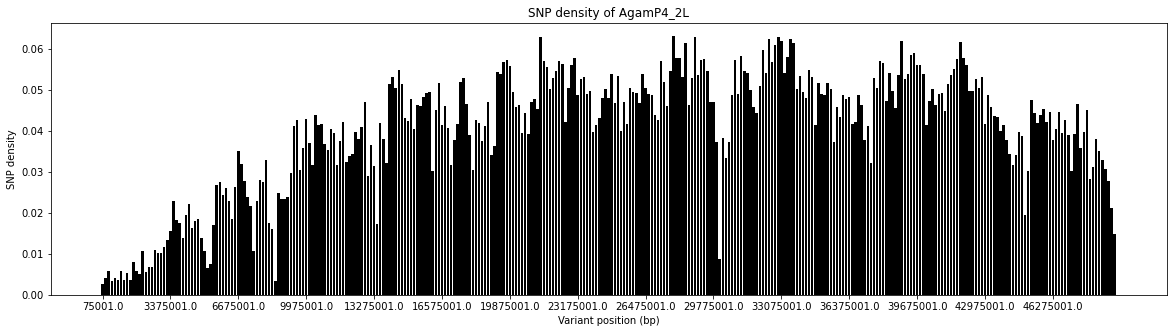

In [469]:
#plot
import matplotlib.pyplot as plt

import seaborn as sns

fig, ax = plt.subplots(figsize=(20, 5))

plot_2L=sns.barplot(data=ds_sel, x=midpoints, y=numpointscom, ax=ax, color="black")
ax.locator_params(axis="x", tight=None, nbins=15)
plot_2L.set(xlabel=("Variant position (bp)"), ylabel=("SNP density"), title=("SNP density of AgamP4_2L"))


fig.savefig('Ara_AgamP4_2L_3.pdf', dpi=300)

In [379]:
os. getcwd()

'/Users/christinagkertsou/Desktop/Finalyearproject'

In [359]:
numpointscom=[i/150_000 for i in numpoints]
print(numpointscom)

[0.0025666666666666667, 0.004033333333333333, 0.00584, 0.003266666666666667, 0.004026666666666666, 0.0036666666666666666, 0.00572, 0.0037, 0.005266666666666667, 0.0036533333333333335, 0.00794, 0.005853333333333334, 0.00502, 0.010666666666666666, 0.0054666666666666665, 0.00684, 0.006866666666666667, 0.010893333333333333, 0.010226666666666667, 0.01008, 0.011586666666666667, 0.013433333333333334, 0.01565333333333333, 0.022893333333333335, 0.018286666666666666, 0.017506666666666667, 0.013906666666666666, 0.01948, 0.02226, 0.016226666666666667, 0.018073333333333334, 0.018433333333333333, 0.013786666666666666, 0.010733333333333333, 0.00658, 0.0074466666666666665, 0.0169, 0.026846666666666668, 0.02758, 0.02428, 0.02616, 0.022926666666666668, 0.01848, 0.026393333333333335, 0.03509333333333333, 0.03178, 0.027853333333333334, 0.023913333333333335, 0.021666666666666667, 0.01066, 0.022933333333333333, 0.028006666666666666, 0.0276, 0.03282, 0.017513333333333332, 0.016033333333333333, 0.003386666666

In [ ]:
#Subset contig for AgamP4_2R
ds_sel_2R = ds.isel(variants=ds.variant_contig_name == 'AgamP4_2R')
ds_sel_2R

In [ ]:
#Subset contig position

ds_sel_2R['variant_position'][:100].compute()

In [ ]:
#GitHub splice

from typing import Any, List, Optional, Sequence, Union

import numpy as np
import xarray as xr


def pslice_to_indexer(
    ds: xr.Dataset,
    contig: Union[None, str, Sequence[Optional[str]]] = None,
    start: Union[None, int, Sequence[Optional[int]]] = None,
    end: Union[None, int, Sequence[Optional[int]]] = None,
) -> Any:
    """Convert a genomic position slice (or slices) to an Xarray indexer for selecting variants.
    Parameters
    ----------
    ds
        Genotype call dataset.
    contig
        A single contig, or a sequence of contigs. If None and there is only one contig in the dataset then
        that contig will be assumed.
    start
        A single start position, or a sequence of start positions. Start positions are inclusive, following Python semantics.
        A start position of None means start of contig.
    end
        A single end position, or a sequence of end positions. End positions are exclusive, following Python semantics.
        An end position of None means end of contig.
    Returns
    -------
    An Xarray indexer suitable for indexing the dataset using :meth:`xarray.Dataset.isel` with a ``variants`` dimension key.
    Warnings
    --------
    The end position of indels are *not* considered, so the behavior is more
    like the bcftools ``--targets`` option (which only considers start position)
    than the ``--regions`` option (which considers overlaps).
    Examples
    --------
    >>> import sgkit as sg
    >>> ds = sg.simulate_genotype_call_dataset(n_variant=10, n_sample=2, n_contig=2)
    >>> ds.isel(dict(variants=sg.pslice_to_indexer(ds, "0"))) # doctest: +SKIP
    <xarray.Dataset>
    Dimensions:             (variants: 5, alleles: 2, samples: 2, ploidy: 2)
    Dimensions without coordinates: variants, alleles, samples, ploidy
    Data variables:
        variant_contig      (variants) int64 0 0 0 0 0
        variant_position    (variants) int64 0 1 2 3 4
        variant_allele      (variants, alleles) |S1 b'C' b'G' b'A' ... b'G' b'C'
        sample_id           (samples) <U2 'S0' 'S1'
        call_genotype       (variants, samples, ploidy) int8 0 0 1 0 1 ... 0 1 1 0 0
        call_genotype_mask  (variants, samples, ploidy) bool False False ... False
    >>> ds.isel(dict(variants=sg.pslice_to_indexer(ds, contigs=("0", "1"), starts=(2, 3), ends=(4, None)))) # doctest: +SKIP
    <xarray.Dataset>
    Dimensions:             (variants: 4, alleles: 2, samples: 2, ploidy: 2)
    Dimensions without coordinates: variants, alleles, samples, ploidy
    Data variables:
        variant_contig      (variants) int64 0 0 1 1
        variant_position    (variants) int64 2 3 3 4
        variant_allele      (variants, alleles) |S1 b'G' b'A' b'A' ... b'C' b'A'
        sample_id           (samples) <U2 'S0' 'S1'
        call_genotype       (variants, samples, ploidy) int8 1 0 0 1 0 ... 0 1 0 1 1
        call_genotype_mask  (variants, samples, ploidy) bool False False ... False
    """
    size = ds.dims["variants"]
    all_contigs = ds.attrs["contigs"]
    variant_contig = ds.variant_contig.values
    variant_position = ds.variant_position.values

    if contig is None:
        if len(all_contigs) != 1:
            raise ValueError("Contig must specified when dataset has multiple contigs.")

        # TODO: improve type checks
        if (
            (start is None and end is None)
            or isinstance(start, int)
            or isinstance(end, int)
        ):
            contig = all_contigs[0]
        else:
            if start is not None:
                n = len(start)
            elif end is not None:
                n = len(end)
            contig = [all_contigs[0]] * n

    # TODO: check contigs, starts, ends are all the same length (with some caveats - e.g. if on one contig)

    if (
        isinstance(contig, str)
        and (start is None or isinstance(start, int))
        and (end is None or isinstance(end, int))
    ):
        # assume single for the moment
        slice = _pslice_to_slice(
            all_contigs, variant_contig, variant_position, contig, start, end
        )
        return slice
    else:
        slices = [
            _pslice_to_slice(all_contigs, variant_contig, variant_position, c, s, e)
            for (c, s, e) in zip(contig, start, end)
        ]
        return np.concatenate([np.arange(*sl.indices(size)) for sl in slices])  # type: ignore[no-untyped-call]


def _pslice_to_slice(
    all_contigs: List[str],
    variant_contig: Any,
    variant_position: Any,
    contig: str,
    start: Optional[int] = None,
    end: Optional[int] = None,
) -> slice:

    contig_index = all_contigs.index(contig)
    contig_range = np.searchsorted(variant_contig, [contig_index, contig_index + 1])

    if start is None and end is None:
        start_index, end_index = contig_range
    else:
        contig_pos = variant_position[slice(contig_range[0], contig_range[1])]
        if start is None:
            start_index = contig_range[0]
            end_index = contig_range[0] + np.searchsorted(contig_pos, [end])[0]
        elif end is None:
            start_index = contig_range[0] + np.searchsorted(contig_pos, [start])[0]
            end_index = contig_range[1]
        else:
            start_index, end_index = contig_range[0] + np.searchsorted(
                contig_pos, [start, end]
            )

    return slice(start_index, end_index)

In [ ]:
#pslice for specific positions
pslice_to_indexer(ds_sel_2R, 'AgamP4_2R', 3900, 4500)

In [ ]:
#select for the first 100 variants
ds_sel_2R['variant_position'][:100].compute()

In [ ]:
#saving in subset the splice of the specific positions
x2 = ds_sel_2R.isel(variants=pslice_to_indexer(ds_sel, 'AgamP4_2R', 3900, 4500))
x2

In [ ]:
#length of variants for which we subsetted (here 0, because no variants for that subset)
len(x2["variant_position"].compute())

In [ ]:
#open length file and save in dictionary
with open('AgamP4.sizes', 'r') as f:
    sizes = f.readlines()
    

sizes_dict = {}

for size in sizes:
    chrom, lenght = size.split()
    
    sizes_dict[chrom] = int(lenght)

sizes_dict

In [ ]:
#np.array and for loop to get the start and end positions
window_limits2 = np.arange(1, sizes_dict['AgamP4_2R'], 50_000)

windows2 = []

for i in range(0, len(window_limits2), 1):
    windows.append((window_limits2[i-1], window_limits2[i]))

windows

In [ ]:
midpoints2 = []

numpoints2 = []



#teliko kai me kentra
for window2 in windows2[1:]:
    lower_limit2 = int(window[0])
    upper_limit2 = int(window[1])
    print(window2)
    x2 = pslice_to_indexer(ds_sel, 'AgamP4_2R', lower_limit2, upper_limit2)
    num_snps2 = x2.stop - x2.start
    numpoints2.append(num_snps2)
    # print(len(x['variant_position']))
    mid2=(lower_limit+upper_limit)/2
    midpoints2.append(mid2)

In [442]:
from typing import Any, List, Optional, Sequence, Union

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import seaborn as sns

def pslice_to_indexer(
    ds: xr.Dataset,
    contig: Union[None, str, Sequence[Optional[str]]] = None,
    start: Union[None, int, Sequence[Optional[int]]] = None,
    end: Union[None, int, Sequence[Optional[int]]] = None,
) -> Any:
    """Convert a genomic position slice (or slices) to an Xarray indexer for selecting variants.
    Parameters
    ----------
    ds
        Genotype call dataset.
    contig
        A single contig, or a sequence of contigs. If None and there is only one contig in the dataset then
        that contig will be assumed.
    start
        A single start position, or a sequence of start positions. Start positions are inclusive, following Python semantics.
        A start position of None means start of contig.
    end
        A single end position, or a sequence of end positions. End positions are exclusive, following Python semantics.
        An end position of None means end of contig.
    Returns
    -------
    An Xarray indexer suitable for indexing the dataset using :meth:`xarray.Dataset.isel` with a ``variants`` dimension key.
    Warnings
    --------
    The end position of indels are *not* considered, so the behavior is more
    like the bcftools ``--targets`` option (which only considers start position)
    than the ``--regions`` option (which considers overlaps).
    Examples
    --------
    >>> import sgkit as sg
    >>> ds = sg.simulate_genotype_call_dataset(n_variant=10, n_sample=2, n_contig=2)
    >>> ds.isel(dict(variants=sg.pslice_to_indexer(ds, "0"))) # doctest: +SKIP
    <xarray.Dataset>
    Dimensions:             (variants: 5, alleles: 2, samples: 2, ploidy: 2)
    Dimensions without coordinates: variants, alleles, samples, ploidy
    Data variables:
        variant_contig      (variants) int64 0 0 0 0 0
        variant_position    (variants) int64 0 1 2 3 4
        variant_allele      (variants, alleles) |S1 b'C' b'G' b'A' ... b'G' b'C'
        sample_id           (samples) <U2 'S0' 'S1'
        call_genotype       (variants, samples, ploidy) int8 0 0 1 0 1 ... 0 1 1 0 0
        call_genotype_mask  (variants, samples, ploidy) bool False False ... False
    >>> ds.isel(dict(variants=sg.pslice_to_indexer(ds, contigs=("0", "1"), starts=(2, 3), ends=(4, None)))) # doctest: +SKIP
    <xarray.Dataset>
    Dimensions:             (variants: 4, alleles: 2, samples: 2, ploidy: 2)
    Dimensions without coordinates: variants, alleles, samples, ploidy
    Data variables:
        variant_contig      (variants) int64 0 0 1 1
        variant_position    (variants) int64 2 3 3 4
        variant_allele      (variants, alleles) |S1 b'G' b'A' b'A' ... b'C' b'A'
        sample_id           (samples) <U2 'S0' 'S1'
        call_genotype       (variants, samples, ploidy) int8 1 0 0 1 0 ... 0 1 0 1 1
        call_genotype_mask  (variants, samples, ploidy) bool False False ... False
    """
    size = ds.dims["variants"]
    all_contigs = ds.attrs["contigs"]
    variant_contig = ds.variant_contig.values
    variant_position = ds.variant_position.values

    if contig is None:
        if len(all_contigs) != 1:
            raise ValueError("Contig must specified when dataset has multiple contigs.")

    # TODO: improve type checks
        if (
            (start is None and end is None)
            or isinstance(start, int)
            or isinstance(end, int)
        ):
            contig = all_contigs[0]
        else:
            if start is not None:
                n = len(start)
            elif end is not None:
                n = len(end)
            contig = [all_contigs[0]] * n

# TODO: check contigs, starts, ends are all the same length (with some caveats - e.g. if on one contig)

    if (
        isinstance(contig, str)
        and (start is None or isinstance(start, int))
        and (end is None or isinstance(end, int))
    ):
    # assume single for the moment
        slice = _pslice_to_slice(
            all_contigs, variant_contig, variant_position, contig, start, end
        )
        return slice
    else:
        slices = [
            _pslice_to_slice(all_contigs, variant_contig, variant_position, c, s, e)
            for (c, s, e) in zip(contig, start, end)
        ]
        return np.concatenate([np.arange(*sl.indices(size)) for sl in slices])  # type: ignore[no-untyped-call]


def _pslice_to_slice(
    all_contigs: List[str],
    variant_contig: Any,
    variant_position: Any,
    contig: str,
    start: Optional[int] = None,
    end: Optional[int] = None,
) -> slice:

    contig_index = all_contigs.index(contig)
    contig_range = np.searchsorted(variant_contig, [contig_index, contig_index + 1])

    if start is None and end is None:
        start_index, end_index = contig_range
    else:
        contig_pos = variant_position[slice(contig_range[0], contig_range[1])]
        if start is None:
            start_index = contig_range[0]
            end_index = contig_range[0] + np.searchsorted(contig_pos, [end])[0]
        elif end is None:
            start_index = contig_range[0] + np.searchsorted(contig_pos, [start])[0]
            end_index = contig_range[1]
        else:
            start_index, end_index = contig_range[0] + np.searchsorted(
                contig_pos, [start, end]
            )

    return slice(start_index, end_index)

#taking contig size 
with open("AgamP4.sizes", 'r') as f:
    sizes = f.readlines()


sizes_dict = {}

for size in sizes:
    chrom, lenght = size.split()

    sizes_dict[chrom] = int(lenght)

sizes_dict

# STARTS HERE
# plot_snp_density(ds, 'AgamP4_2L', sizes_dict)

{'AgamP4_2L': 49364325,
 'AgamP4_2R': 61545105,
 'AgamP4_3L': 41963435,
 'AgamP4_3R': 53200684,
 'AgamP4_UNKN': 42389979,
 'AgamP4_X': 24393108,
 'AgamP4_Y_unplaced': 237045,
 'AgamP4_Mt': 15363}

In [467]:
# STARTS HERE
# plot_snp_density(ds, 'AgamP4_2L', sizes_dict, name_figure)


def plot_snp_density(ds, contig_name, sizes_dict, path_figure, window_size=150_000):

# subset your dataset by contig_name + compute
    ds_sel= ds.isel(variants=ds.variant_contig_name == contig_name)



# create windows
    window_limits = np.arange(1, sizes_dict[contig_name], window_size)

    windows = []

    for i in range(0, len(window_limits), 1):
        windows.append((window_limits[i-1], window_limits[i]))

    windows

#limits, number of snps, mid
    midpoints = []

    numpoints=[]



#teliko kai me kentra
    for window in windows[1:]:
        lower_limit = int(window[0])
        upper_limit = int(window[1])
        #edo afto me to length anti gia to pslice, meta kanonika
        x = pslice_to_indexer(ds_sel, contig_name, lower_limit, upper_limit)
        num_snps = x.stop - x.start
        numpoints.append(num_snps)
    # print(len(x['variant_position']))
        mid=(lower_limit+upper_limit)/2
        midpoints.append(mid)

# plotting

    numpointscom=[i/150_000 for i in numpoints]

    fig, ax = plt.subplots(figsize=(20, 5))

    plot_cont=sns.lineplot(data=ds_sel, x=midpoints, y=numpointscom, ax=ax)
    plot_cont.set(xlabel=("Variant position (bp)"), ylabel=("SNP density"), title=("SNP density of {contig_name}"))

    plt.show()


    fig.savefig(f'{path_figure}/SNP_density_{contig_name}.pdf', dpi=300) 

    return None


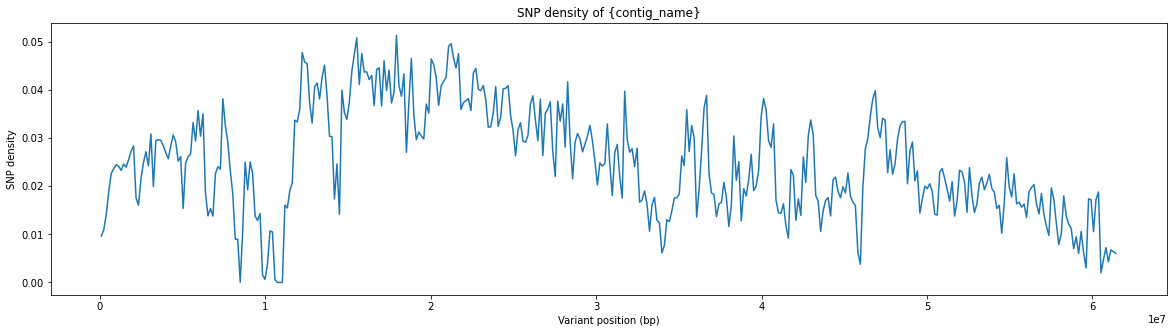

In [468]:
plot_snp_density(ds, "AgamP4_2R",  sizes_dict, "/Users/christinagkertsou/Desktop/Finalyearproject", 150_000)